In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def OneCompartDilantin(half_life, interval, volume, dosage, absorption_fraction, plotTime):
  elimination_constant = -np.log(0.5)/half_life
  # print(elimination_constant)

  time = []
  substanceA = []
  entering = absorption_fraction * (dosage * 1000 / volume)
  # print(entering)
  drug_in_system = 0

  delT = 0.1

  for i in np.arange(0, plotTime, delT):
    if (i % interval == 0):
      drug_in_system = drug_in_system + entering

    time = np.append(i, time)
    A_rem = drug_in_system * elimination_constant * delT
    drug_in_system = drug_in_system - A_rem

    substanceA = np.append(drug_in_system, substanceA)

  plt.plot(time, substanceA, color='g')
  plt.xlabel('Time in hours')
  plt.ylabel('drug_concentration in \u03bcg/mL')
  plt.axhline(y = 10, color='b', label='MEC')
  plt.axhline(y = 20, color='r', label='MTC')
  plt.legend()
  plt.grid(True)


Suppose a patient taking Dilantin decides for convenience to take 300 mg
once a day instead of 100 mg every 8 h. Adjusting the model in OneCom-
partDilantin, determine the results of such a decision. Is the decision
advisable?

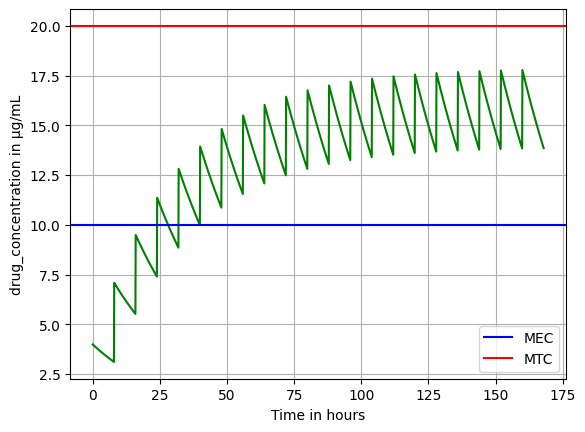

In [ ]:
OneCompartDilantin(22, 8, 3000, 100, 0.12, 168)

In the below plot, we have changed the Dosage to 300mg every 24 hours, from the above dosage of 100mg every 8 hours. We can infer that the dosage change will not be beneficial.

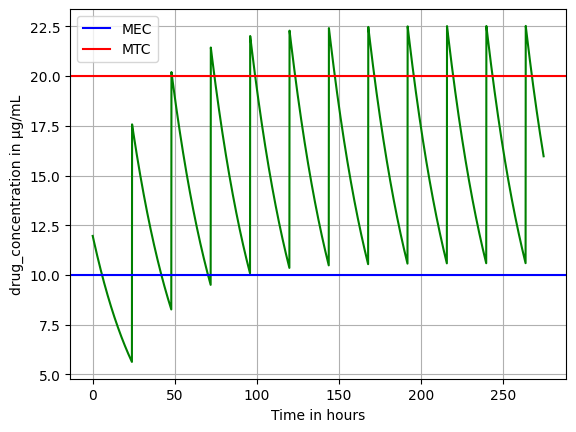

In [ ]:
OneCompartDilantin(22, 24, 3000, 300, 0.12, 275)

In the below section we compared our model with different half-life value and how it affects the elimination constant.

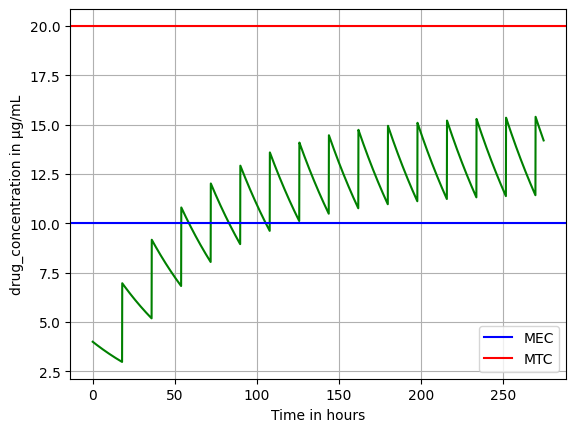

In [ ]:
OneCompartDilantin(42, 18, 3000, 100, 0.12, 275)

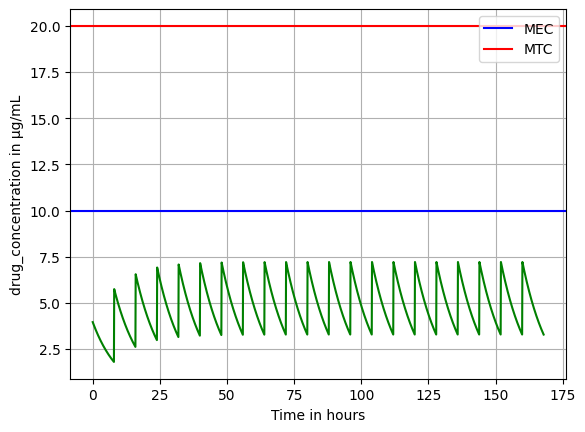

In [ ]:
OneCompartDilantin(7, 8, 3000, 100, 0.12, 168)

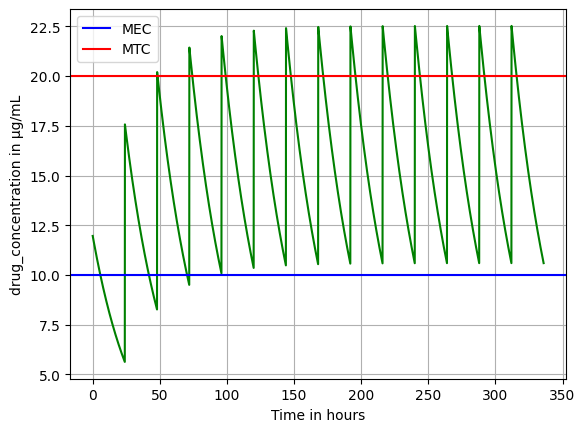

In [ ]:
OneCompartDilantin(22, 24, 3000, 300, 0.12, 336)

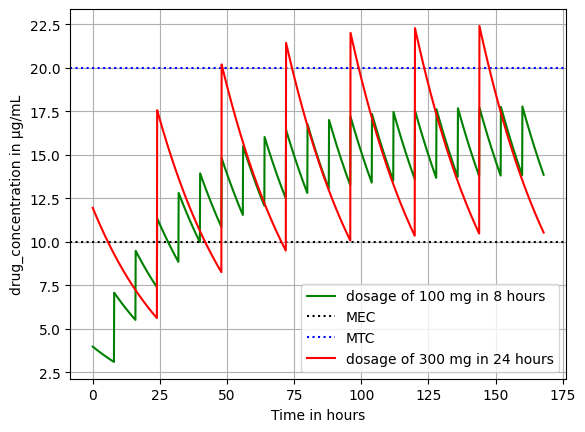

In [ ]:
half_life = 22
interval = 8
volume = 3000
dosage = 100 #nug
absorption_fraction = 0.12
elimination_constant = -np.log(0.5)/half_life
  # print(elimination_constant)

time = []
substanceA = []
entering = absorption_fraction * (dosage * 1000 / volume)
# print(entering)
drug_in_system = 0

delT = 0.1

for i in np.arange(0, 168, delT):
  if (i % interval == 0):
    drug_in_system = drug_in_system + entering

  time = np.append(i, time)
  A_rem = drug_in_system * elimination_constant * delT
  drug_in_system = drug_in_system - A_rem

  substanceA = np.append(drug_in_system, substanceA)

plt.plot(time, substanceA, color='g', label='dosage of 100 mg in 8 hours')
plt.xlabel('Time in hours')
plt.ylabel('drug_concentration in \u03bcg/mL')
plt.axhline(y = 10, color='k', label='MEC', linestyle=':')
plt.axhline(y = 20, color='b', label='MTC', linestyle=':')
plt.grid(True)

interval = 24
dosage = 300 #nug

time = []
substanceA = []
entering = absorption_fraction * (dosage * 1000 / volume)
# print(entering)
drug_in_system = 0

delT = 0.1

for i in np.arange(0, 168, delT):
  if (i % interval == 0):
    drug_in_system = drug_in_system + entering

  time = np.append(i, time)
  A_rem = drug_in_system * elimination_constant * delT
  drug_in_system = drug_in_system - A_rem

  substanceA = np.append(drug_in_system, substanceA)

plt.plot(time, substanceA, color='r', label='dosage of 300 mg in 24 hours')
plt.legend()



0.21660849392498288


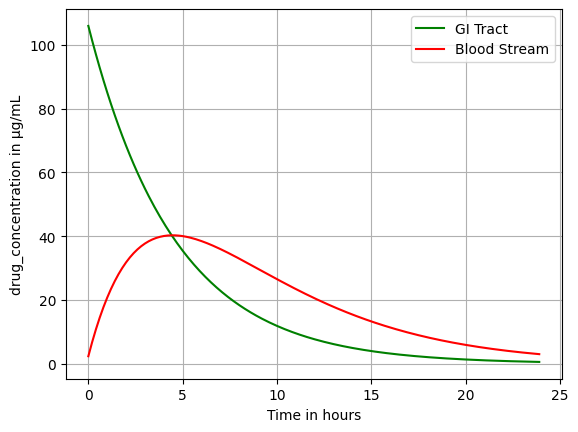

In [ ]:
half_life = 3.2 #hour
plasma_volume = 3000 #mL
aspirin_in_plasma = 1 * 325 * 1000 #μg
elimination_constant = -np.log(0.5)/half_life
print(elimination_constant)
plasma_concentration = aspirin_in_plasma/plasma_volume
blood_stream = 0


time = []
substanceA = []
substanceB = []

delT = 0.1

for i in np.arange(0, 24, delT):
  time = np.append(i, time)
  A_rem = plasma_concentration * elimination_constant * delT


  plasma_concentration = plasma_concentration - A_rem
  blood_stream = blood_stream + A_rem - (blood_stream * elimination_constant * delT)

  substanceA = np.append(plasma_concentration, substanceA)
  substanceB = np.append(blood_stream, substanceB)

plt.plot(time, substanceA, color='g', label='GI Tract')
plt.plot(time, substanceB, color='r', label='Blood Stream')
plt.xlabel('Time in hours')
plt.ylabel('drug_concentration in \u03bcg/mL')

plt.legend()
plt.grid(True)


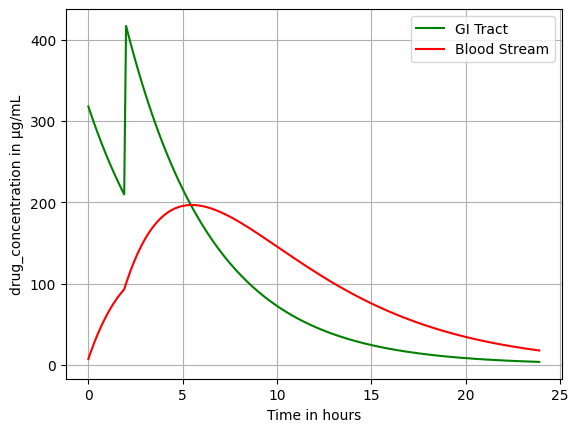

In [ ]:
half_life = 3.2 #hour
plasma_volume = 3000 #mL
aspirin_in_plasma = 3 * 325 * 1000 #μg
elimination_constant = -np.log(0.5)/half_life
plasma_concentration = aspirin_in_plasma/plasma_volume
blood_stream = 0


time = []
substanceA = []
substanceB = []
# substanceA = np.append(plasma_concentration, substanceA)

delT = 0.1

for i in np.arange(0, 24, delT):
  time = np.append(i, time)
  if (i == 2):
    plasma_concentration = plasma_concentration + ((2 * 325 * 1000)/plasma_volume)

  A_rem = plasma_concentration * elimination_constant * delT


  plasma_concentration = plasma_concentration - A_rem
  blood_stream = blood_stream + A_rem - (blood_stream * elimination_constant * delT)

  substanceA = np.append(plasma_concentration, substanceA)
  substanceB = np.append(blood_stream, substanceB)

plt.plot(time, substanceA, color='g', label='GI Tract')
plt.plot(time, substanceB, color='r', label='Blood Stream')
plt.xlabel('Time in hours')
plt.ylabel('drug_concentration in \u03bcg/mL')

plt.legend()
plt.grid(True)


Project Part-3 Loading Dose

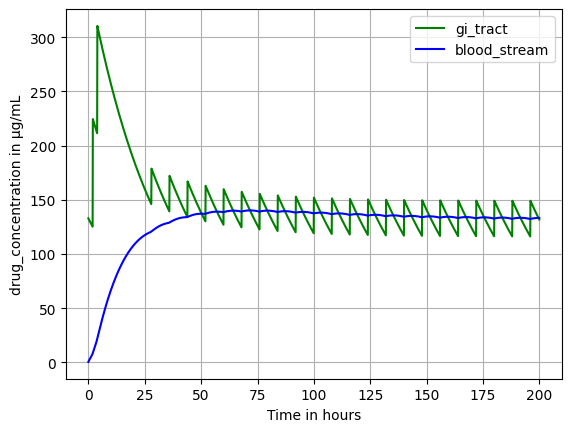

In [ ]:
half_life = 22
interval = 8
volume = 3000
dosage = 100 #nug
absorption_fraction = 1
elimination_constant = -np.log(0.5)/half_life

time = []
gi_tract_concentration = []
blood_stream_concentration = []
blood_stream = 0
gi_tract = 0

# print(entering)

delT = 0.1


for i in np.arange(0, 200, delT):
  if (i==0):
    gi_tract = gi_tract + absorption_fraction * (400 * 1000 / volume)
  if (i==2):
    gi_tract = gi_tract + absorption_fraction * (300 * 1000 / volume)
  if (i==4):
    gi_tract = gi_tract + absorption_fraction * (300 * 1000 / volume)

  if (i > 24 and (i + 4) % interval == 0):
    gi_tract = gi_tract + (100 * 1000 / volume)


  time = np.append(i, time)



  A_rem = gi_tract * elimination_constant * delT
  gi_tract = gi_tract - A_rem
  blood_stream = blood_stream + A_rem - (blood_stream * elimination_constant * delT)

  gi_tract_concentration = np.append(gi_tract, gi_tract_concentration)
  blood_stream_concentration = np.append(blood_stream, blood_stream_concentration)

plt.plot(time, gi_tract_concentration, color='g', label='gi_tract')
plt.plot(time, blood_stream_concentration, color='b', label='blood_stream')
plt.xlabel('Time in hours')
plt.ylabel('drug_concentration in \u03bcg/mL')
# plt.axvline(x = 28, color ='red')
plt.legend()
plt.grid(True)